<center> <h1> Data Preparation </center>

In [83]:
# Importing all the necessary python module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from IPython.display import display, HTML

# Importing the CSV
df_initial = pd.read_csv('Telco_Customer_Churn.csv')
df_initial.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
# View the number of records and columns
df_initial.shape

(7043, 21)

In [85]:
# Print the column names
df_initial.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<b>These are the columns in the dataset: 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']</b>

In [86]:
for col in df_initial.columns:
    if df_initial[col].dtype=='object':
        print(f'column name is "{col}" \n', df_initial[col].unique())
        print("")

column name is "customerID" 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

column name is "gender" 
 ['Female' 'Male']

column name is "Partner" 
 ['Yes' 'No']

column name is "Dependents" 
 ['No' 'Yes']

column name is "PhoneService" 
 ['No' 'Yes']

column name is "MultipleLines" 
 ['No phone service' 'No' 'Yes']

column name is "InternetService" 
 ['DSL' 'Fiber optic' 'No']

column name is "OnlineSecurity" 
 ['No' 'Yes' 'No internet service']

column name is "OnlineBackup" 
 ['Yes' 'No' 'No internet service']

column name is "DeviceProtection" 
 ['No' 'Yes' 'No internet service']

column name is "TechSupport" 
 ['No' 'Yes' 'No internet service']

column name is "StreamingTV" 
 ['No' 'Yes' 'No internet service']

column name is "StreamingMovies" 
 ['No' 'Yes' 'No internet service']

column name is "Contract" 
 ['Month-to-month' 'One year' 'Two year']

column name is "PaperlessBilling" 
 ['Yes' 'No']

column name is "PaymentMethod" 
 ['Electroni

In [87]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<b> TotalCharges Should have been a float64 instead of Object therefore, i will be converting the datatype into float. </b>

In [88]:
# Converting Total Charges to a numerical data type and check for Null entries
df_initial.TotalCharges = pd.to_numeric(df_initial.TotalCharges, errors='coerce')
df_initial.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

From the output above, there are 11 missing values for TotalCharges. I will be removing those 11 entries from the dataset.

In [89]:
# Removing the 11 missing entries 
df_initial.dropna(inplace = True)

# Remove customer ID from dataset
df = df_initial.iloc[:,1:]

# Convert predictor variable (Churn) into a binary (1/0) numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Convert all the categorical variables into dummy variables
df_dummy = pd.get_dummies(df, dtype=int)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<br><hr><br>

<center> <h1> Exploratory Data Analysis (EDA) </center>

<center> <h1> Checking if the Data is Bias </center>

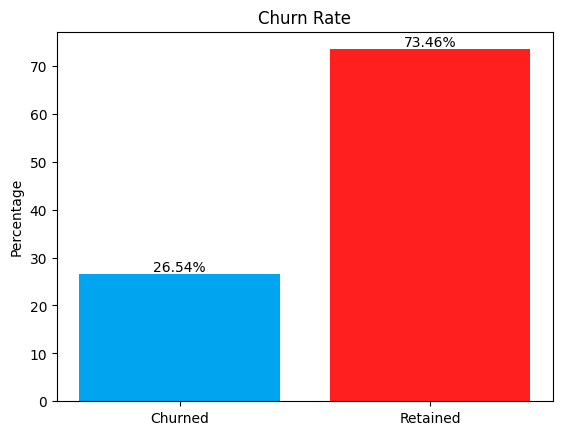

(7043, 1869, 26.536987079369588)

In [90]:

df = pd.read_csv('Telco_Customer_Churn.csv')

# Calculate total customers, number of churned customers, and churn rate
total_customers = df.shape[0]
churned_customers = df[df['Churn'] == 'Yes'].shape[0]
churn_rate = churned_customers / total_customers *100

total_customers, churned_customers, churn_rate

# Generate a bar chart for churn rate
fig, ax = plt.subplots()
ax.bar(['Churned', 'Retained'], [churn_rate, 100-churn_rate], color=['#00A4EF', '#FF1F1F'])
ax.set_ylabel('Percentage')
ax.set_title('Churn Rate')

# Display the actual churn rate on top of the bars
ax.text('Churned', churn_rate, f'{churn_rate:.2f}%', ha='center', va='bottom')
ax.text('Retained', 100-churn_rate, f'{100-churn_rate:.2f}%', ha='center', va='bottom')

plt.show()

(total_customers, churned_customers, churn_rate)

<center><b>A Total of 7,043 Customers, With 1,869 Churns Reflecting a 26.54% Churn Rate</b></center> 

The dataset from a telecommunications company reveals that out of 7,043 customers, 1,869 have churned, translating to a churn rate of approximately 26.54%. This percentage signifies a notable level within the customer base, emphasizing an area of concern that the company needs to address. A churn rate of over a quarter suggests that there might be underlying issues affecting customer satisfaction or competitive market factors influencing customer retention. These metrics can be a valuable indicator for the company to evaluate service quality, pricing strategies, customer support efficiency, and other strategic factors to implement effective retention strategies and improve overall customer loyalty.

The dataset exhibits a class imbalance, characterized by a disproportionate number of retained customers compared to those who have churned. This imbalance is a common challenge in predictive modeling, as it can lead to a model that is overly proficient at predicting the majority class while underperforming on the minority class.To enhance the accuracy of predictive analytics and reduce the likelihood of a biased model, strategies like resampling methods, adoption of appropriate algorithms, or the use of alternative performance metrics are often employed to mitigate the effects of such an imbalance.

<br><hr><br>

In [91]:
def displayChurnStatisticsByCategory(df, category):
    # Prepare the data for plotting
    churn_yes = df[df['Churn'] == 'Yes'].groupby(category).size()
    churn_no = df[df['Churn'] == 'No'].groupby(category).size()

    # Combine 'Yes' and 'No' churn data into one DataFrame for plotting
    churn_data = pd.DataFrame({'Yes': churn_yes, 'No': churn_no}).fillna(0)

    #Plot the counts instead of percentages
    ax = churn_data.plot(kind='bar', color=['#00A4EF', '#FF1F1F'], figsize=(10, 5))
    ax.set_title(f'Churn Counts by {category}')
    ax.set_xlabel(category, fontweight='bold')
    ax.set_ylabel('Count', fontweight='bold')
    ax.legend(title='Churn')
    
    plt.xticks(rotation=0, ha="center")
    plt.tight_layout()
    plt.show()

    # Calculate the total counts and percentages for the churn data
    total_counts = churn_yes + churn_no
    percentage_yes = (churn_yes / total_counts * 100).fillna(0)
    percentage_no = (churn_no / total_counts * 100).fillna(0)

    # Combine all the data into one DataFrame for display
    count_data = pd.DataFrame({
        category: churn_yes.index, 
        'Churn: Yes': churn_yes.values, 
        'Churn: No': churn_no.values, 
        'Total': total_counts.values, 
        'Churn: Yes (%)': percentage_yes.values,
        'Churn: No (%)': percentage_no.values
    }).sort_index()

    # Style the DataFrame without the index column
    styled_table = count_data.style.hide().set_table_styles(
        [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
    ).set_properties(**{'text-align': 'center'}).format({
        'Churn: Yes (%)': '{:.2f}', 
        'Churn: No (%)': '{:.2f}',
        'Total': '{:.0f}', 
        'Churn: Yes': '{:.0f}', 
        'Churn: No': '{:.0f}'
    })
    
    # Directly display the styled DataFrame
    display(styled_table)


def displayChurnVsTenureSummary(df):
    # Determine the maximum tenure to define bin edges dynamically
    max_tenure = df['tenure'].max()
    bin_width = 12  # Define the width of each bin
    num_bins = np.ceil(max_tenure / bin_width).astype(int)  # Calculate the number of bins required
    
    # Generate bin edges and labels dynamically
    bins = [i * bin_width for i in range(num_bins + 1)]
    labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
    
    df['Tenure Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, include_lowest=True)
    
    # Prepare the data for plotting
    churn_data = df.groupby(['Tenure Group', 'Churn']).size().unstack().fillna(0)
    churn_data['Total'] = churn_data.sum(axis=1)
    
    # Plotting the counts instead of percentages
    ax = churn_data[['Yes', 'No']].plot(kind='bar', color=['#00A4EF', '#FF1F1F'], figsize=(11, 5))
    ax.set_title('Churn Count by Tenure Group')
    ax.set_xlabel('Tenure Group (Months)', fontweight='bold')
    ax.set_ylabel('Count', fontweight='bold')
    ax.set_xticklabels(labels, rotation=0)
    ax.legend(title='Churn')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate percentages for the table
    churn_data['Churn: Yes (%)'] = churn_data['Yes'] / churn_data['Total'] * 100
    churn_data['Churn: No (%)'] = churn_data['No'] / churn_data['Total'] * 100
    
    # Prepare the table with counts and percentages
    display_table = churn_data.reset_index()
    display_table.columns = ['Tenure Group', 'Churn: No', 'Churn: Yes', 'Total', 'Churn: Yes (%)','Churn: No (%)']
    styled_table = display_table.style.hide().set_table_styles(
        [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
    ).set_properties(**{'text-align': 'center'}).format({
        'Churn: No (%)': '{:.2f}',
        'Churn: Yes (%)': '{:.2f}', 
        'Total': '{:.0f}', 
        'Churn: No': '{:.0f}',
        'Churn: Yes': '{:.0f}'
    })
    
    display(styled_table)

def plotChurnByChargeGroups(df, charges_column):
    # Ensure charges_column is numeric, converting if necessary
    df[charges_column] = pd.to_numeric(df[charges_column], errors='coerce')
    
    # Calculate bins and labels
    min_charge = df[charges_column].min()
    max_charge = df[charges_column].max()
    bin_width = (max_charge - min_charge) / 5  
    bins = np.arange(min_charge, max_charge + bin_width, bin_width)
    bin_labels = [f'{round(bins[i], 2)} - {round(bins[i+1], 2)}' for i in range(len(bins)-1)]

    # Bin the charges into categories
    df['Charges Group'] = pd.cut(df[charges_column], bins=bins, labels=bin_labels, right=False)
    
    # Prepare data for plotting
    churn_data = df.groupby(['Charges Group', 'Churn']).size().unstack().fillna(0)
    churn_data['Total'] = churn_data.sum(axis=1)
    
    # Plotting the counts in one graph
    churn_data[['Yes', 'No']].plot(kind='bar', color=['#00A4EF', '#FF1F1F'], figsize=(10, 5))
    plt.title(f'Churn by {charges_column} Group')
    plt.xlabel(f'{charges_column}($) Group', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.xticks(rotation=0)
    plt.legend(title='Churn', labels=['Churn: Yes', 'Churn: No'])
    plt.tight_layout()
    plt.show()
    
    # Display the counts table
    churn_data['Churn: Yes (%)'] = churn_data['Yes'] / churn_data['Total'] * 100
    churn_data['Churn: No (%)'] = churn_data['No'] / churn_data['Total'] * 100
    display_table = churn_data[['Yes', 'No', 'Total', 'Churn: Yes (%)', 'Churn: No (%)']].reset_index()
    display_table.columns = [f'{charges_column} Group ($)', 'Churn: Yes', 'Churn: No', 'Total', 'Churn: Yes (%)', 'Churn: No (%)']
    styled_table = display_table.style.hide().set_table_styles(
        [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
    ).set_properties(**{'text-align': 'center'}).format({
        'Churn: Yes (%)': '{:.2f}',
        'Churn: No (%)': '{:.2f}', 
        'Total': '{:.0f}', 
        'Churn: Yes': '{:.0f}',
        'Churn: No': '{:.0f}'
    })
    
    display(styled_table)

<br><hr><br>

<center> <h1> Ploting Catagory vs Churn </center>

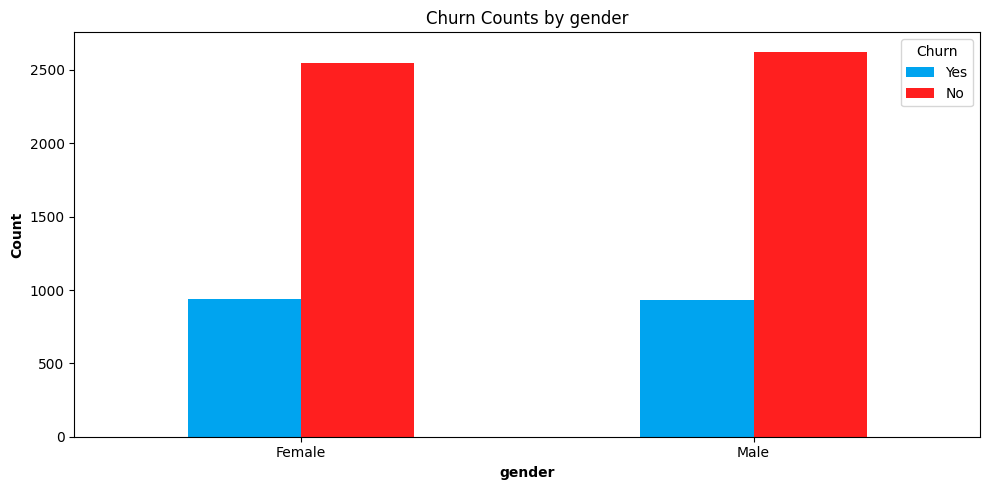

gender,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
Female,939,2549,3488,26.92,73.08
Male,930,2625,3555,26.16,73.84


In [92]:
displayChurnStatisticsByCategory(df, 'gender')

<center><b>Gender shows a balanced churn rate around 26% for both females and males, indicating it may not be a decisive factor for churn prediction models. </b></center> 


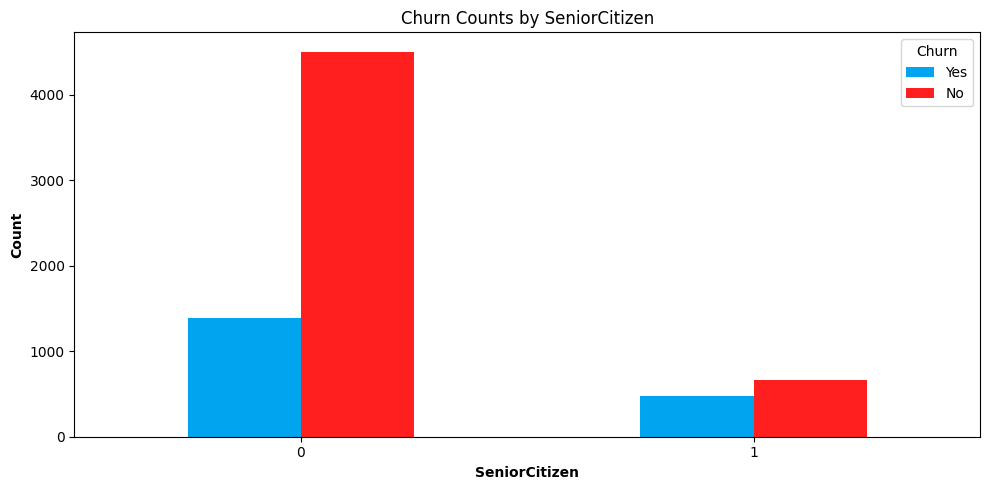

SeniorCitizen,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
0,1393,4508,5901,23.61,76.39
1,476,666,1142,41.68,58.32


In [93]:
displayChurnStatisticsByCategory(df, 'SeniorCitizen')

<center><b>Senior citizen status shows a substantial difference in churn, with senior citizens (label 1) having a higher churn rate at 41.68% compared to non-seniors (label 0) at 23.61%, indicating it could be a significant feature for churn prediction models.</b></center> 

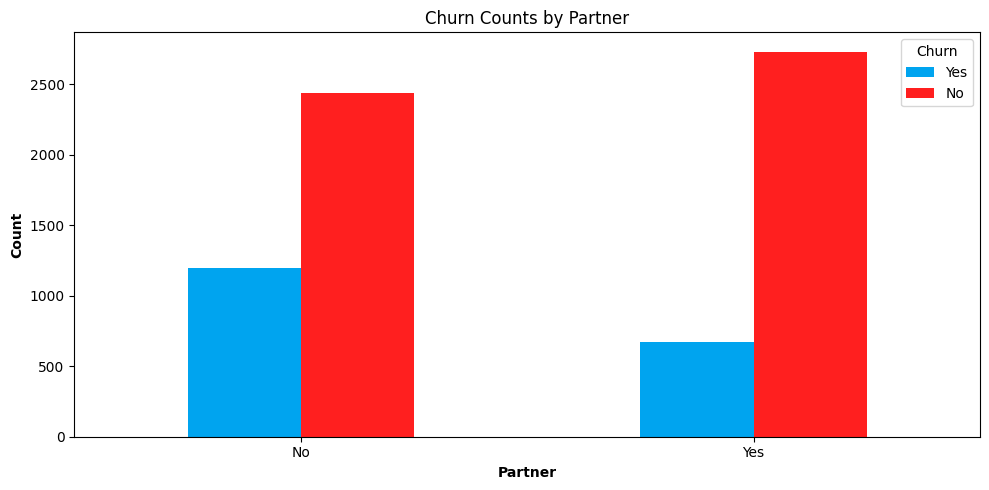

Partner,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,1200,2441,3641,32.96,67.04
Yes,669,2733,3402,19.66,80.34


In [94]:
displayChurnStatisticsByCategory(df, 'Partner')

<center><b>Customers without partners churn at a higher rate of 32.96% compared to 19.66% for those with partners, suggesting partnership status might be a predictive feature for churn models.</b></center> 

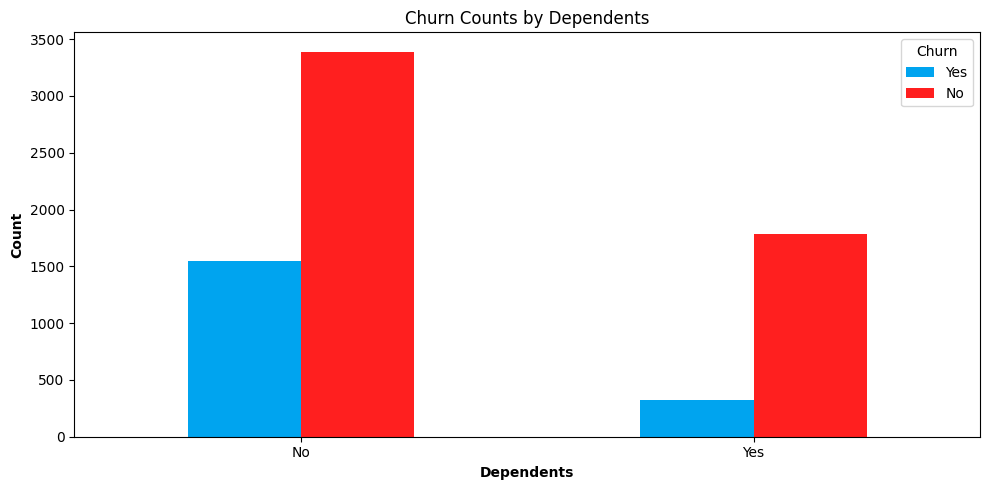

Dependents,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,1543,3390,4933,31.28,68.72
Yes,326,1784,2110,15.45,84.55


In [95]:
displayChurnStatisticsByCategory(df, 'Dependents')

<center><b>Customers with no dependents have a higher churn rate (31.28%) than those with dependents (15.45%), indicating dependents status could influence churn predictions.</b></center> 

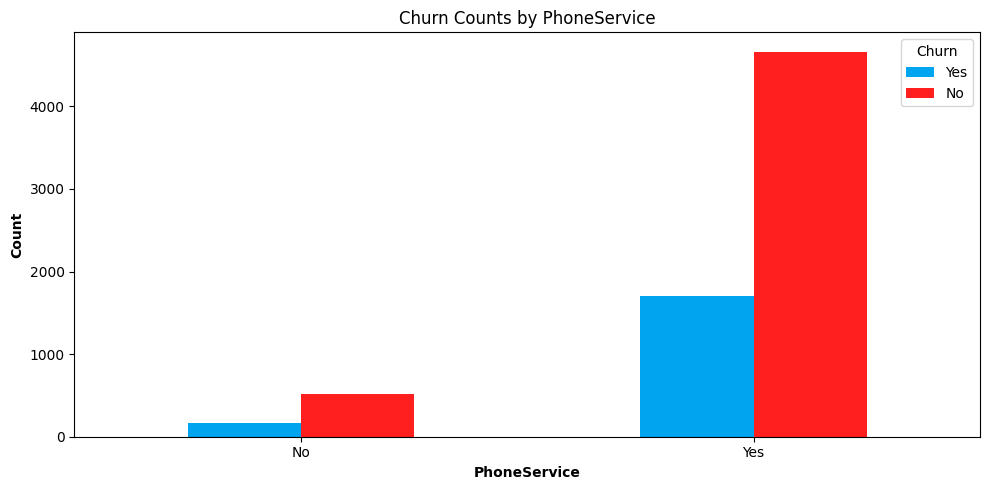

PhoneService,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,170,512,682,24.93,75.07
Yes,1699,4662,6361,26.71,73.29


In [96]:
displayChurnStatisticsByCategory(df, 'PhoneService')

<center><b>Phone service subscription shows a slightly higher churn rate for customers with service (26.71%) than for those without (24.93%), suggesting phone service may not be a significant predictor of churn.</b></center> 

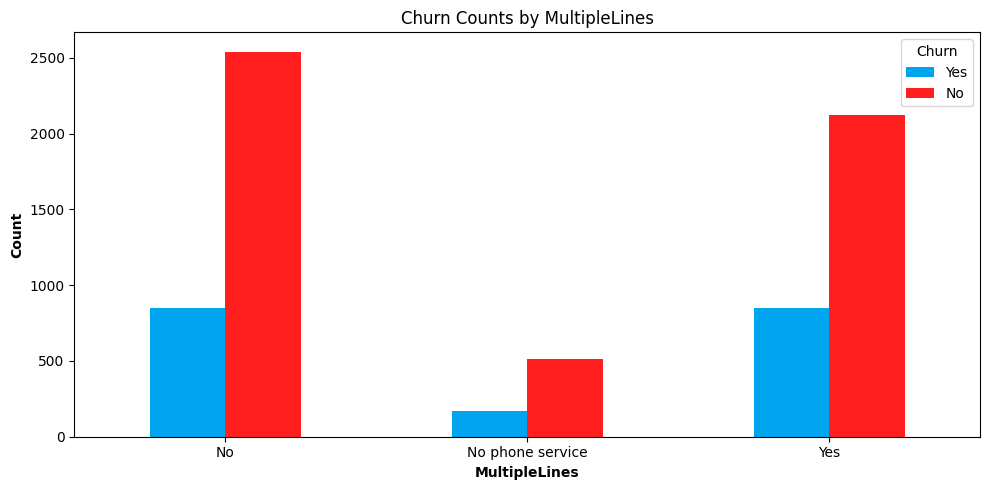

MultipleLines,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,849,2541,3390,25.04,74.96
No phone service,170,512,682,24.93,75.07
Yes,850,2121,2971,28.61,71.39


In [97]:
displayChurnStatisticsByCategory(df, 'MultipleLines')

<center><b>Customers with multiple lines have a slightly higher churn rate (28.61%) compared to those with a single line (25.04%) or no phone service (24.93%), indicating that having multiple lines could be a minor factor in churn prediction.</b></center> 

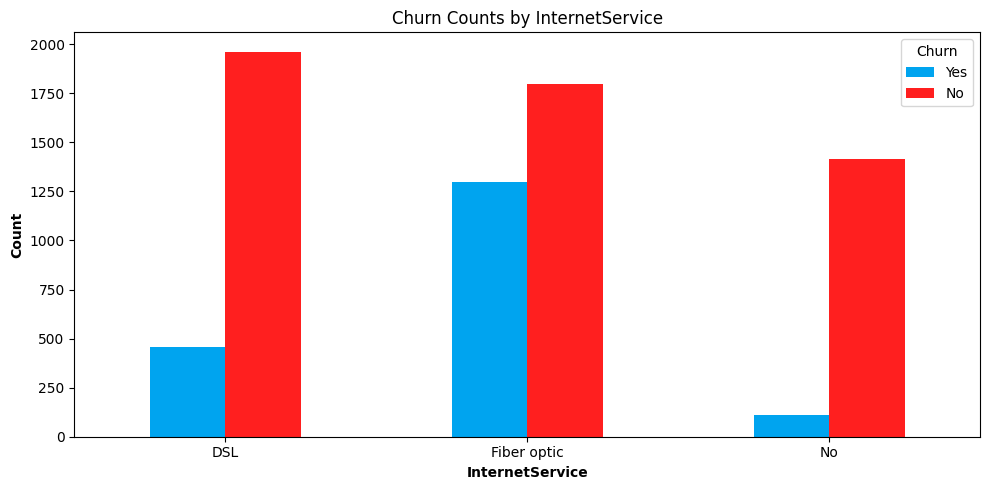

InternetService,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
DSL,459,1962,2421,18.96,81.04
Fiber optic,1297,1799,3096,41.89,58.11
No,113,1413,1526,7.40,92.60


In [98]:
displayChurnStatisticsByCategory(df, 'InternetService')

<center><b>Customers with fiber optic internet service show a significantly higher churn rate at 41.89% compared to those with DSL at 18.96% and those with no internet service at 7.40%, indicating that the type of internet service is a potential predictor of churn.</b></center> 

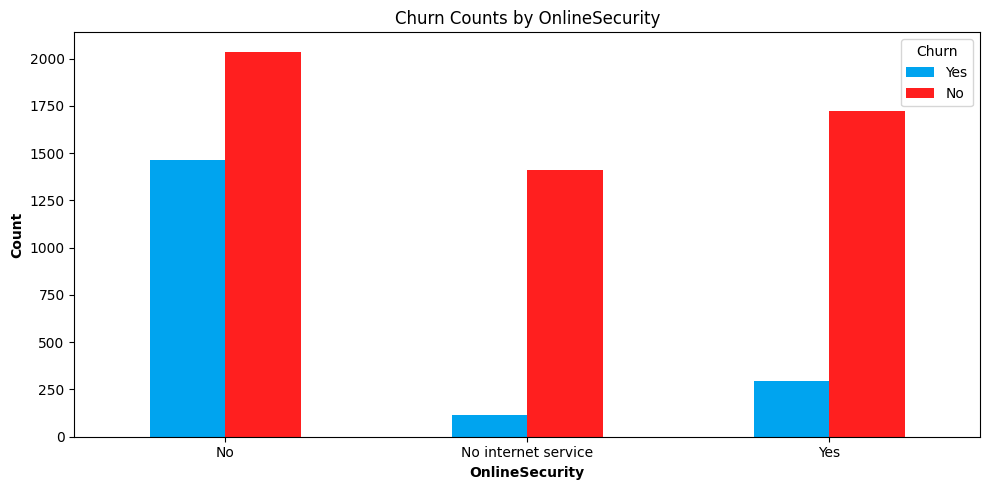

OnlineSecurity,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,1461,2037,3498,41.77,58.23
No internet service,113,1413,1526,7.40,92.60
Yes,295,1724,2019,14.61,85.39


In [99]:
displayChurnStatisticsByCategory(df, 'OnlineSecurity')

<center><b>Without online security service is associated with a higher churn rate of 41.77%, while having online security services is linked to a much lower churn rate of 14.61%, highlighting online security as a key service influencing customer retention</b></center> 

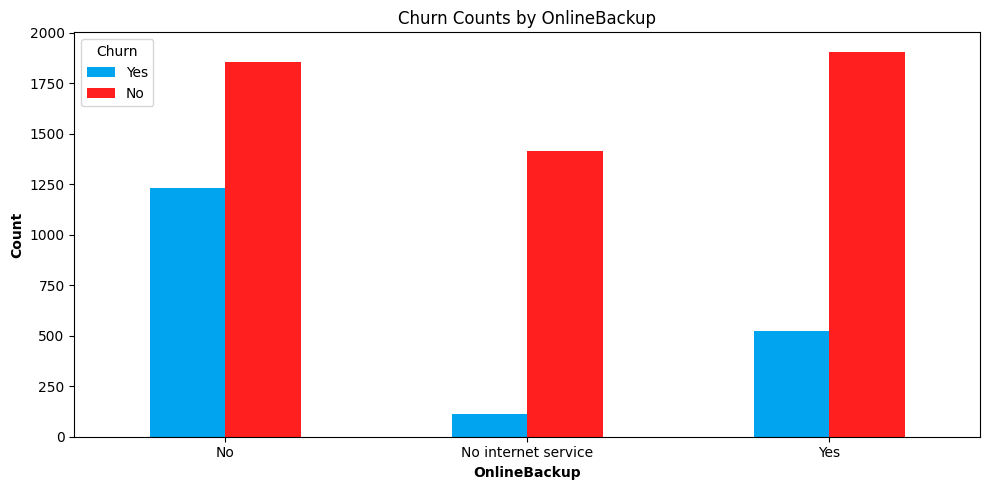

OnlineBackup,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,1233,1855,3088,39.93,60.07
No internet service,113,1413,1526,7.40,92.60
Yes,523,1906,2429,21.53,78.47


In [100]:
displayChurnStatisticsByCategory(df, 'OnlineBackup')

<center><b>Without OnlineBackup service is associated with a higher churn rate of 39.93%, while subscribers to online backup services experience a notably lower churn rate at 21.53%, indicating that online backup features significantly influence customer churn decisions.</b></center> 

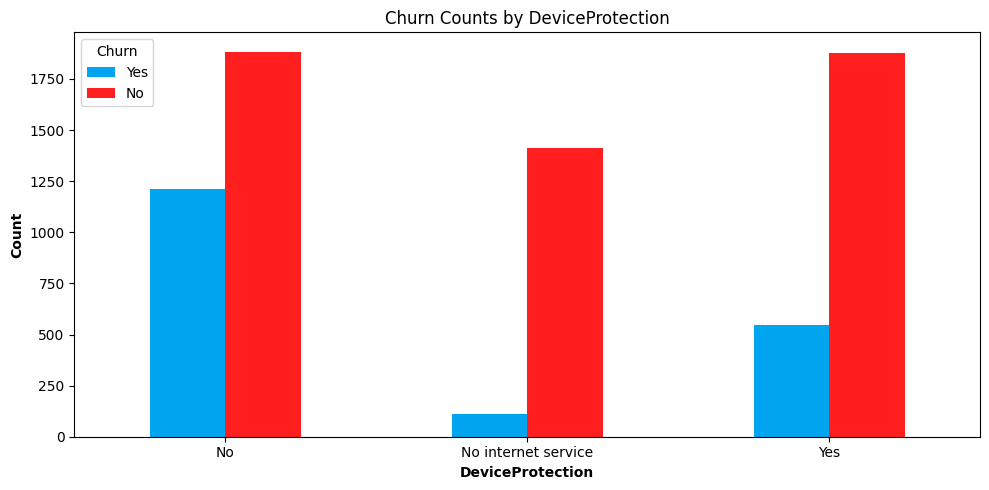

DeviceProtection,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,1211,1884,3095,39.13,60.87
No internet service,113,1413,1526,7.40,92.60
Yes,545,1877,2422,22.50,77.50


In [101]:
displayChurnStatisticsByCategory(df, 'DeviceProtection')

<center><b>Without DeviceProtection service, customers experience a higher churn rate of 39.13%, compared to a 22.50% churn rate for those with device protection, indicating that device protection could be a valuable feature in reducing customer churn.</b></center> 

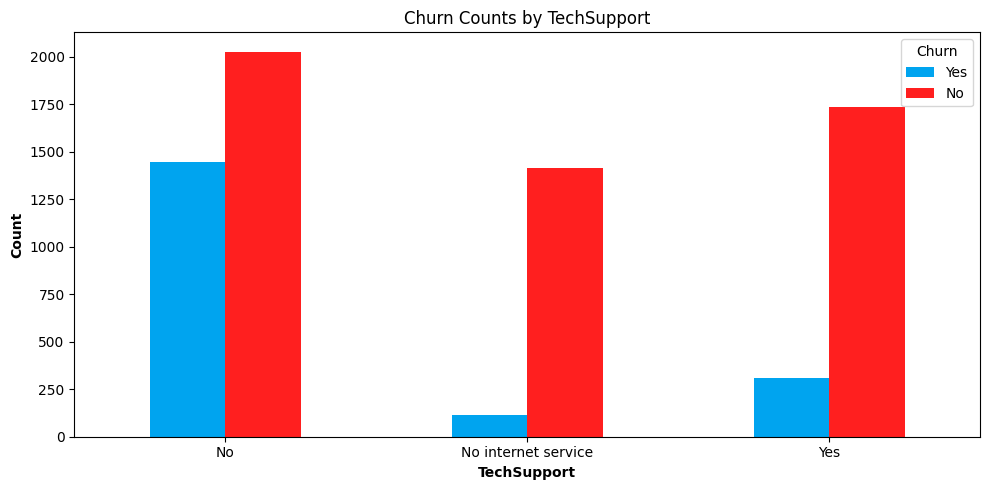

TechSupport,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,1446,2027,3473,41.64,58.36
No internet service,113,1413,1526,7.40,92.60
Yes,310,1734,2044,15.17,84.83


In [102]:
displayChurnStatisticsByCategory(df, 'TechSupport')

<center><b>Without TechSupport service, there is a high churn rate of 41.64%, while access to tech support results in a much lower churn rate of 15.17%, underscoring the importance of tech support in customer retention strategies</b></center> 

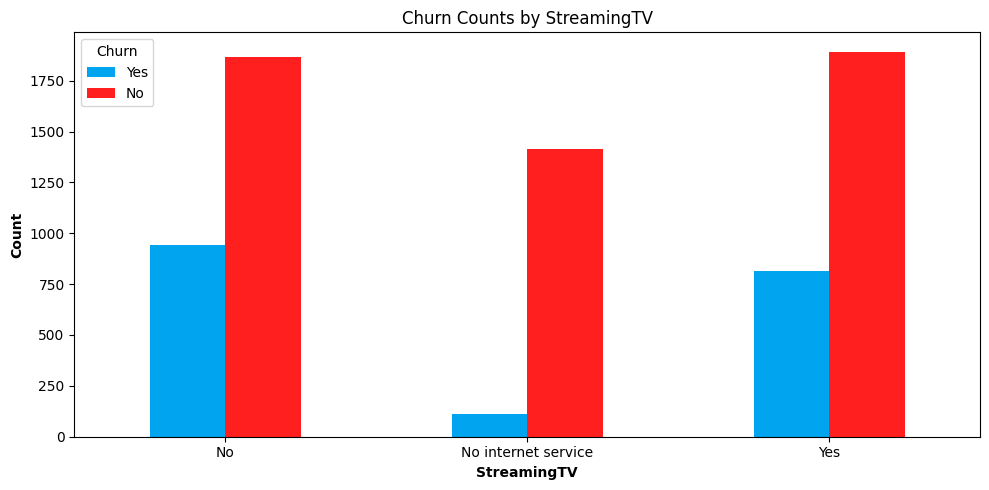

StreamingTV,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,942,1868,2810,33.52,66.48
No internet service,113,1413,1526,7.40,92.60
Yes,814,1893,2707,30.07,69.93


In [103]:
displayChurnStatisticsByCategory(df, 'StreamingTV')

<center><b>Customers without Streaming TV services show a higher churn rate at 33.52% compared to those with the service at 30.07%, indicating a moderate influence of Streaming TV on customer churn decisions.</b></center> 

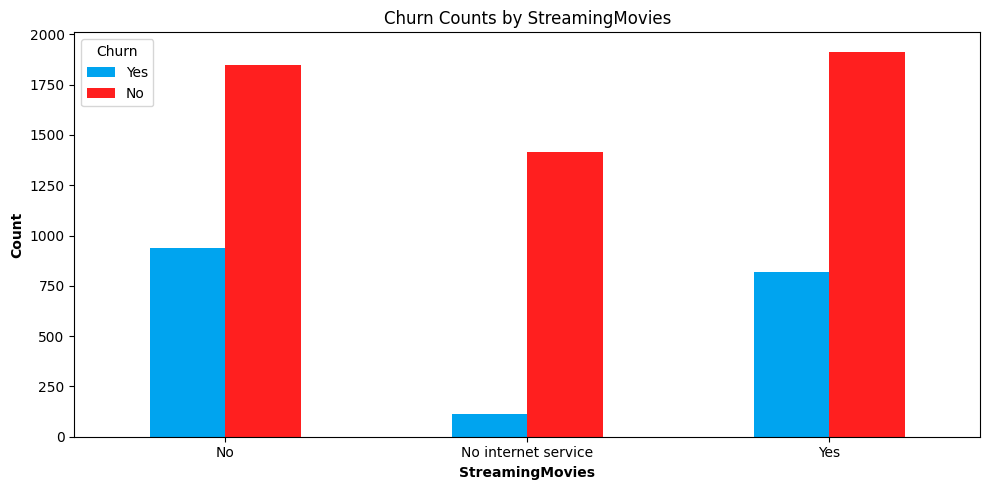

StreamingMovies,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,938,1847,2785,33.68,66.32
No internet service,113,1413,1526,7.40,92.60
Yes,818,1914,2732,29.94,70.06


In [104]:
displayChurnStatisticsByCategory(df, 'StreamingMovies')

<center><b>Customers without Streaming Movies services experience a churn rate of 33.68%, while those with the service have a slightly lower churn rate of 29.94%, suggesting that Streaming Movies may play a role in customer retention.</b></center> 

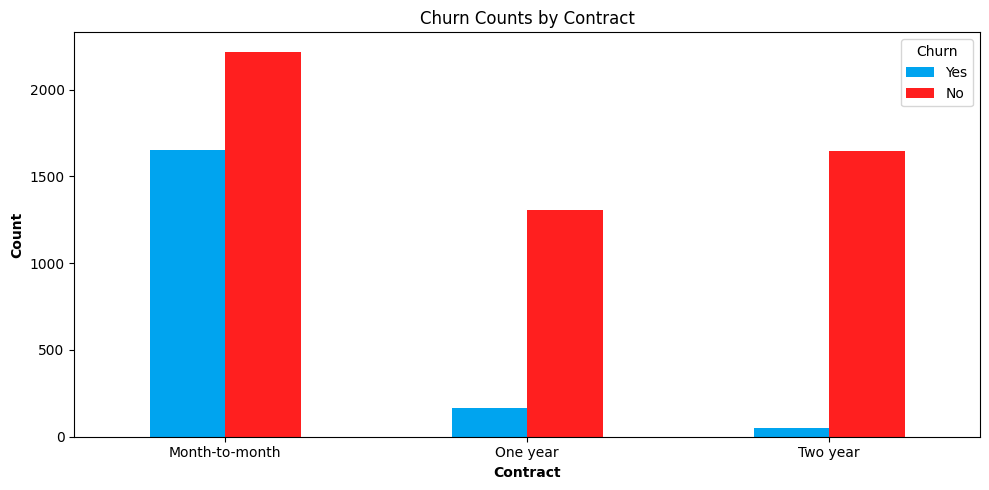

Contract,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
Month-to-month,1655,2220,3875,42.71,57.29
One year,166,1307,1473,11.27,88.73
Two year,48,1647,1695,2.83,97.17


In [105]:
displayChurnStatisticsByCategory(df, 'Contract')

<center><b>Customers on a month-to-month contract have a high churn rate of 42.71%, significantly greater than those on one-year and two-year contracts, which have churn rates of 11.27% and 2.83% respectively, indicating contract length is a strong predictor of churn.</b></center> 

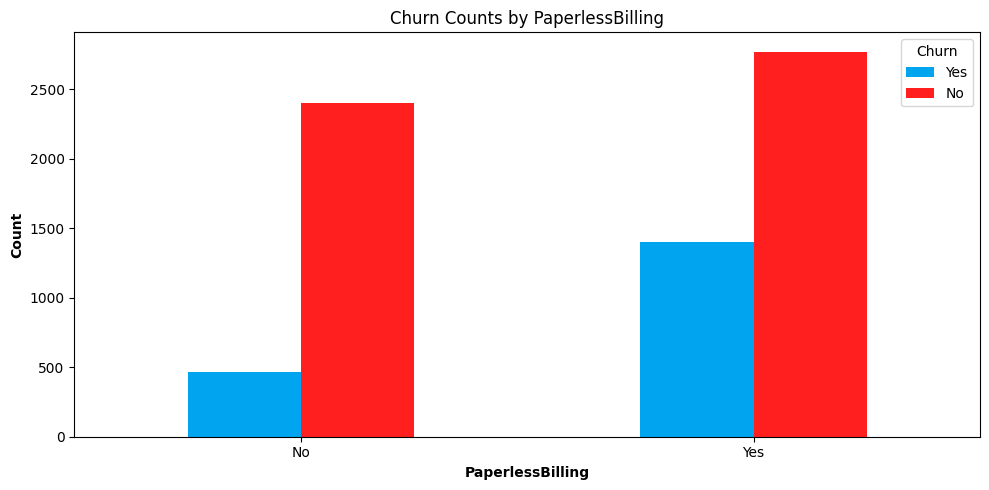

PaperlessBilling,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
No,469,2403,2872,16.33,83.67
Yes,1400,2771,4171,33.57,66.43


In [106]:
displayChurnStatisticsByCategory(df, 'PaperlessBilling')

<center><b>Customers with paperless billing show a churn rate of 33.57%, which is substantially higher than the 16.33% for those without, suggesting that paperless billing correlates with a higher churn rate.</b></center> 

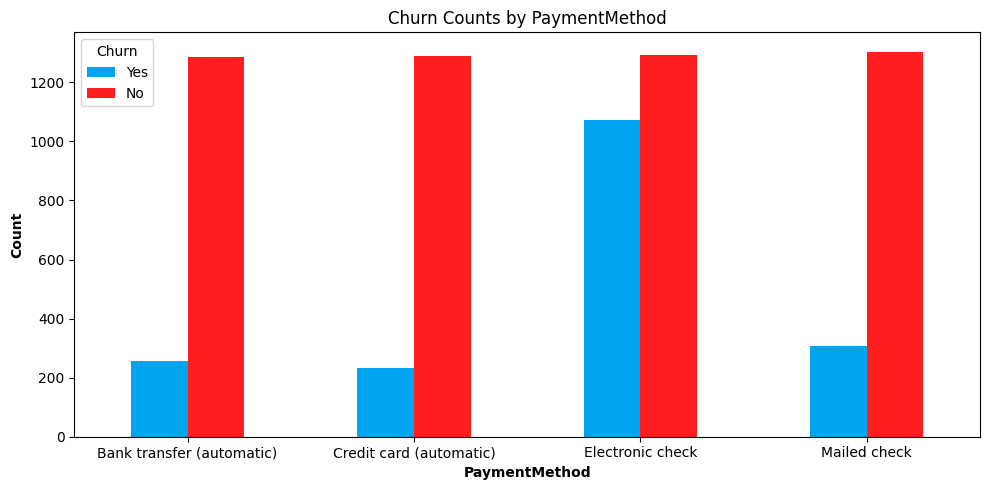

PaymentMethod,Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
Bank transfer (automatic),258,1286,1544,16.71,83.29
Credit card (automatic),232,1290,1522,15.24,84.76
Electronic check,1071,1294,2365,45.29,54.71
Mailed check,308,1304,1612,19.11,80.89


In [107]:
displayChurnStatisticsByCategory(df, 'PaymentMethod')

<center><b>Customers using Electronic check as their payment method exhibit a notably higher churn rate of 45.24% compared to other payment methods, suggesting that the choice of payment method may influence churn behavior and could be a relevant feature for churn prediction models.</b></center> 

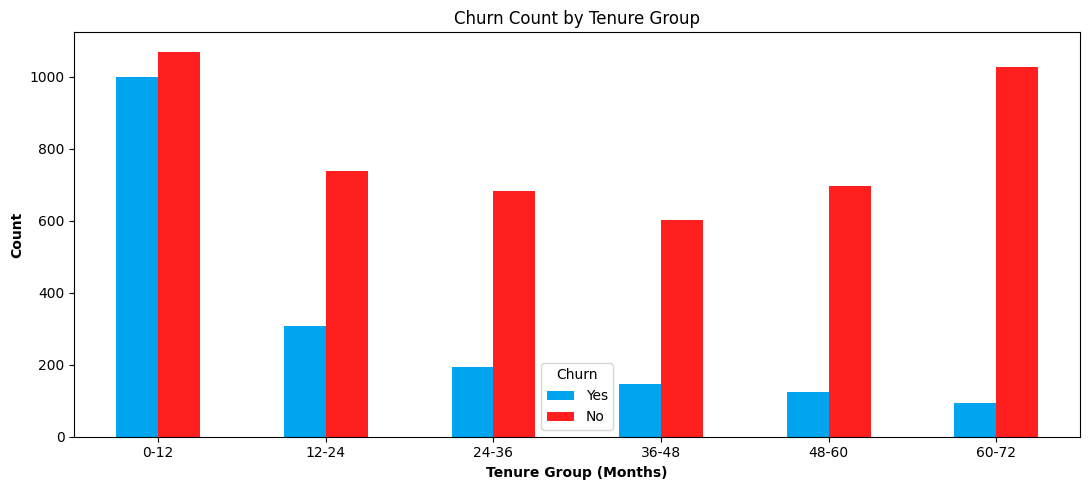

Tenure Group,Churn: No,Churn: Yes,Total,Churn: Yes (%),Churn: No (%)
0-12,1070,999,2069,48.28,51.72
12-24,738,309,1047,29.51,70.49
24-36,683,193,876,22.03,77.97
36-48,602,146,748,19.52,80.48
48-60,697,123,820,15.00,85.00
60-72,1028,93,1121,8.30,91.70


In [108]:
displayChurnVsTenureSummary(df)

<center><b>Churn rates decrease with longer tenure; customers with 0-12 months have the highest churn rate at 48.28%, while those with 61-72 months have the lowest at 8.29%, indicating tenure is a strong indicator for churn.</b></center> 

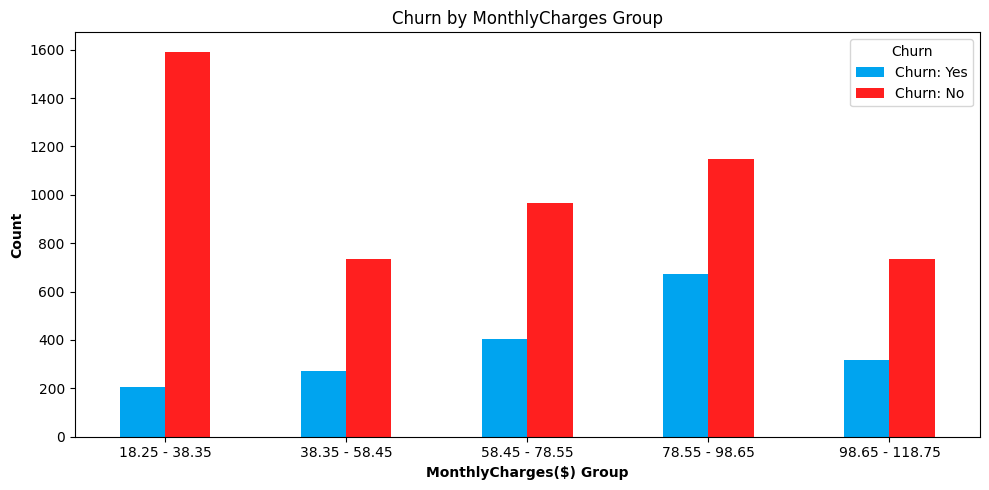

MonthlyCharges Group ($),Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
18.25 - 38.35,205,1592,1797,11.41,88.59
38.35 - 58.45,271,733,1004,26.99,73.01
58.45 - 78.55,403,965,1368,29.46,70.54
78.55 - 98.65,674,1148,1822,36.99,63.01
98.65 - 118.75,316,735,1051,30.07,69.93


In [109]:
plotChurnByChargeGroups(df, 'MonthlyCharges')

<center><b>Higher monthly charges are associated with higher churn rates; for example, the churn rate is 11.41% for the lowest monthly charge group \$18.25 - \$38.35, while it rises to 36.99% for those paying between \$78.55 - \$98.65.</b></center> 

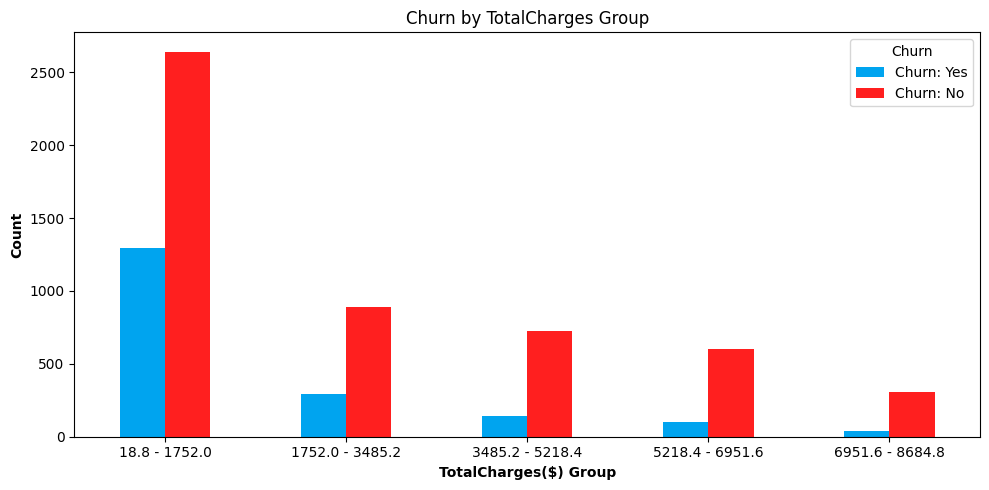

TotalCharges Group ($),Churn: Yes,Churn: No,Total,Churn: Yes (%),Churn: No (%)
18.8 - 1752.0,1295,2642,3937,32.89,67.11
1752.0 - 3485.2,291,888,1179,24.68,75.32
3485.2 - 5218.4,142,724,866,16.40,83.60
5218.4 - 6951.6,104,601,705,14.75,85.25
6951.6 - 8684.8,36,308,344,10.47,89.53


In [110]:
plotChurnByChargeGroups(df, 'TotalCharges')

<center><b>Customers with lower total charges have higher churn rates; specifically, the churn rate is highest at 32.89% for the lowest total charge group \$18.8 - \$1752.0 and decreases to 10.46% for the highest total charge group \$6951.6 - \$8684.8.</b></center> 

<br><hr><br>

<center> <h1> Further Analysis of the Numeric Values (Tenure, MonthlyCharges & TotalCharges) </center>

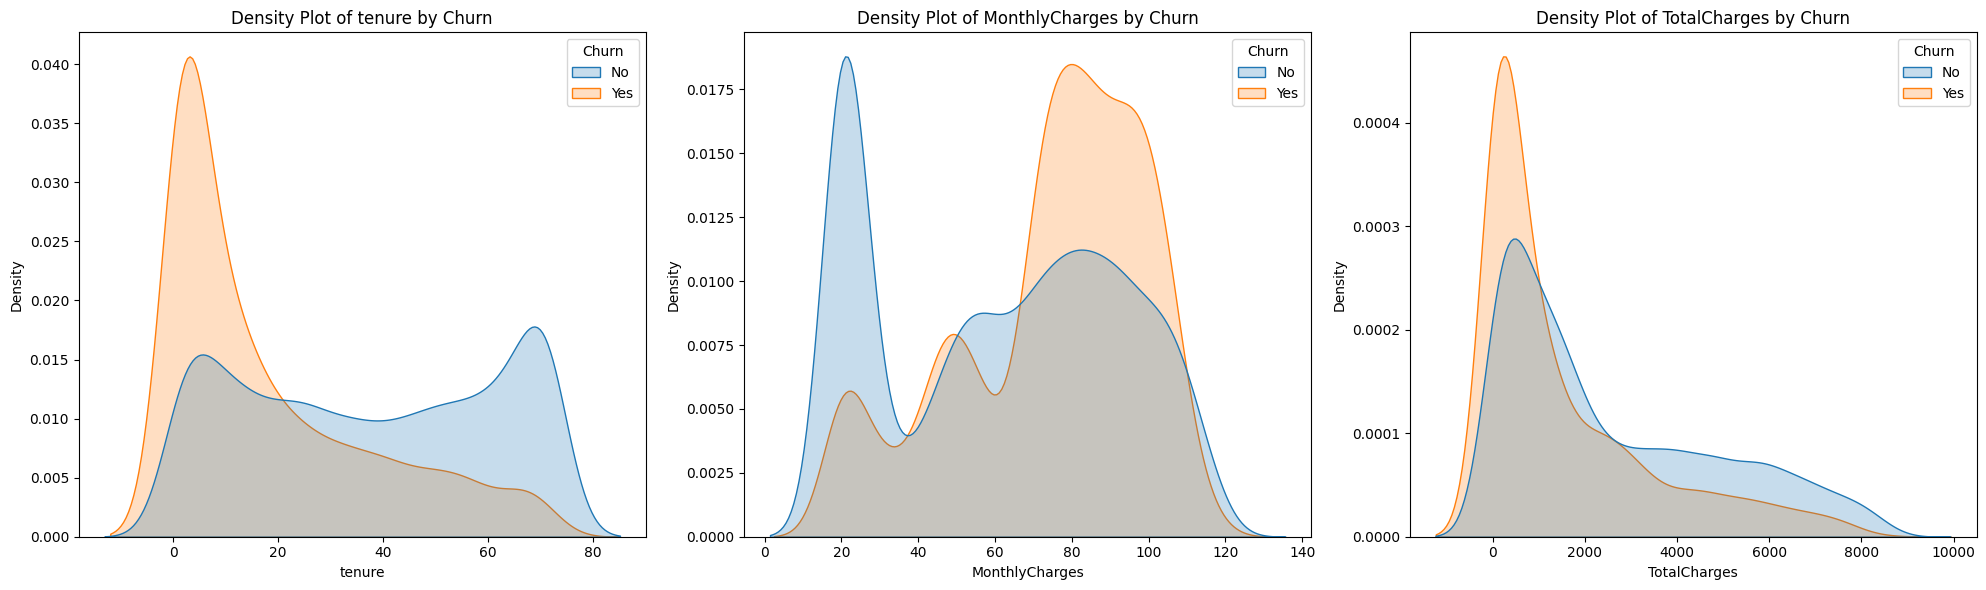

In [111]:
def plot_density_plots(df, variables, hue):
    plt.figure(figsize=(20, 6))
    for i, variable in enumerate(variables, 1):
        plt.subplot(1, len(variables), i)
        sns.kdeplot(data=df, x=variable, hue=hue, common_norm=False, fill=True)
        plt.title(f'Density Plot of {variable} by Churn')
        plt.ylabel('Density')
        plt.xlabel(variable)
    
    plt.tight_layout()
    plt.show()

variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
hue = 'Churn'
plot_density_plots(df, variables, hue)

The three density plots provides insights into customer behavior related to churn. 

In the first plot, the density of the 'Yes' churn group peaks sharply at lower tenure values, suggesting that customers who have been with the company for a shorter period are more likely to leave. In contrast, the 'No' churn group has a flatter and broader density curve, indicating that loyal customers have a wide range of tenures. 

The second plot shows a pronounced peak for the 'Yes' churn group at higher monthly charges, which implies that higher fees may contribute to customers' decisions to churn. 

Lastly, the third plot for total charges shows that churned customers tend to have lower overall charges, possibly reflecting that newer or less committed customers are more inclined to churn, as they may have accrued fewer charges over a shorter tenure with the company. 

These plots collectively suggest that shorter tenure, higher monthly charges, and lower total charges may be factors associated with a higher probability of churn.

<center> <h3> Checking the Outliers of the data </center>

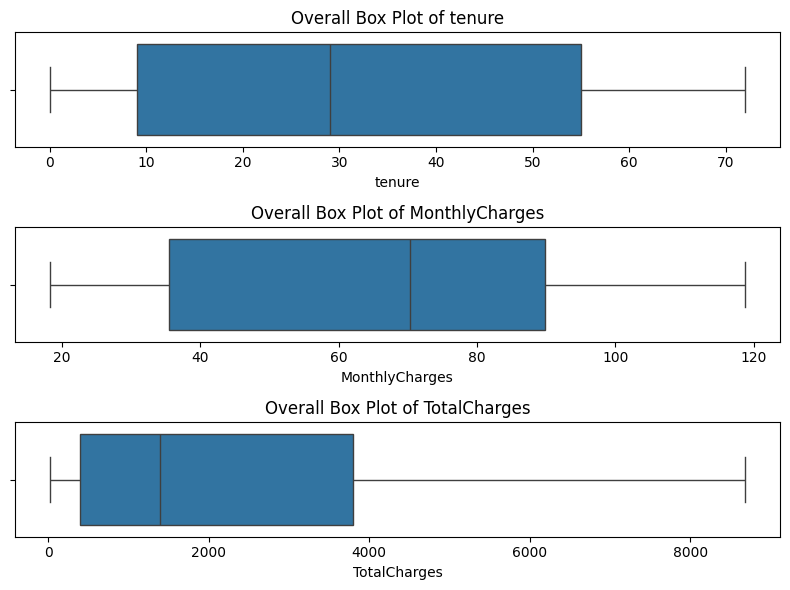

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_horizontal_boxplots_overall(df, variables):
    """
    Plots horizontal box plots for each specified variable in a DataFrame to visualize overall outliers.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - variables: List of strings, where each string is a column name in df for which a box plot will be created.
    """
    num_vars = len(variables)
    plt.figure(figsize=(8, 2 * num_vars))# Adjust figure size based on the number of variables for better readability
    
    for i, variable in enumerate(variables):
        plt.subplot(num_vars, 1, i + 1)
        sns.boxplot(x=df[variable], orient='h')  # Specify horizontal orientation
        plt.title(f'Overall Box Plot of {variable}')
        plt.xlabel(variable)
    
    plt.tight_layout()
    plt.show()

# Assuming your DataFrame is named 'df'
variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
plot_horizontal_boxplots_overall(df, variables)

It appears there are no significant outliers present in any of the three distributions for tenure, monthly charges, or total charges. The plots show a range of data that falls within what is considered typical, with all data points lying within the 'whiskers' of the box plots, which typically extend to 1.5 times the interquartile range from the box. The absence of outliers suggests that the dataset has a relatively uniform distribution without extreme values deviating from the general trend in these three categories.

<br><hr><br>

<center> <h1> Correlation to Churn with other Category </center>

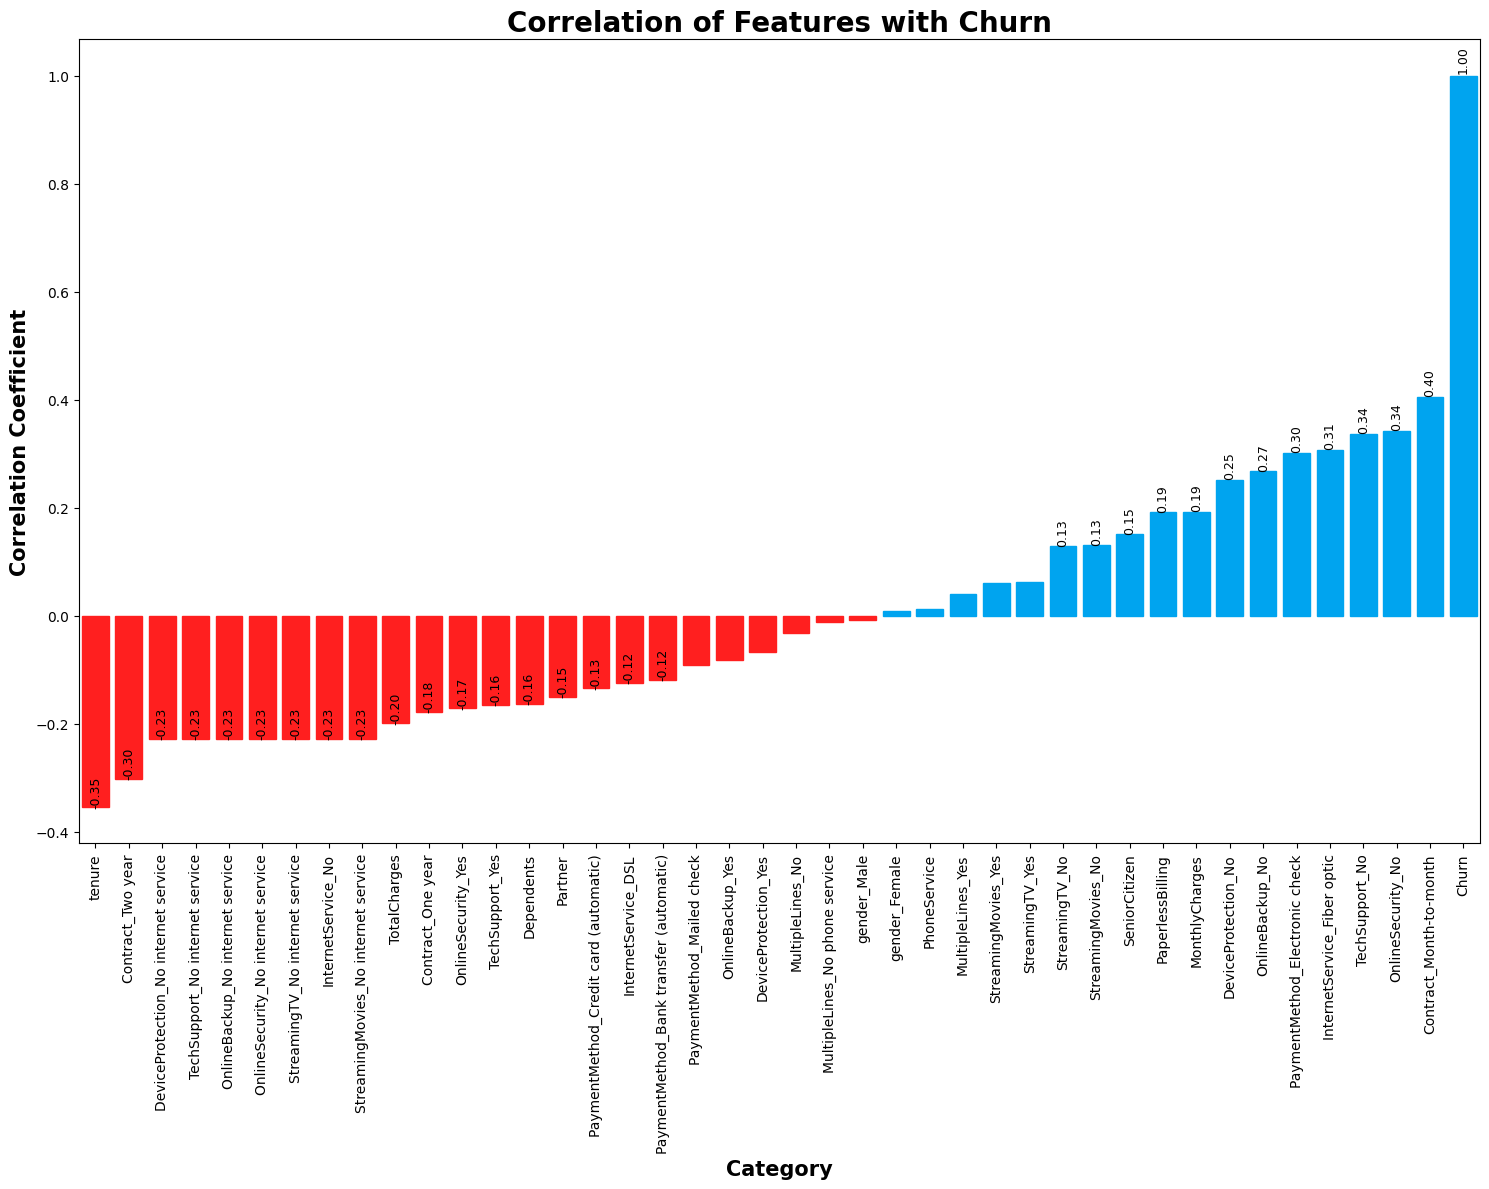

In [113]:
df = pd.read_csv('Telco_Customer_Churn.csv')

# Convert 'TotalCharges' to numeric and drop any NaNs if necessary
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop the 'customerID' column as it's not needed for correlation
df = df.drop(columns=['customerID'])

# Binary encode 'Churn' if it's not already numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Binary encode other binary categorical variables
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# One-Hot encode nominal categorical variables with more than two categories
nominal_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaymentMethod', 'gender']
df = pd.get_dummies(df, columns=nominal_columns)

# Now calculate the correlation with the target 'Churn'
correlation_with_churn = df.corr()['Churn'].sort_values()

plt.figure(figsize=(15, 12))
bars = sns.barplot(x=correlation_with_churn.index, y=correlation_with_churn.values)

# Iterate over the bars and set the color individually
colors = ['#00A4EF' if x > 0 else '#FF1F1F' for x in correlation_with_churn.values]
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)
    height = bar.get_height()
    if abs(height) >= 0.1:  # Set a threshold for significant correlation
        plt.text(bar.get_x() + bar.get_width()/2., height * (1 + 0.005),  # Add a small offset above the bar
                 f'{height:.2f}', ha='center', va='bottom', fontsize=9, rotation=90)

plt.xticks(rotation=90)
plt.title('Correlation of Features with Churn', fontweight='bold', fontsize=20)
plt.ylabel('Correlation Coefficient', fontweight='bold', fontsize=15)
plt.xlabel('Category', fontweight='bold', fontsize=15)

# Tight layout to ensure labels don't get cut off
plt.tight_layout()

# Display the plot
plt.show()

Positive correlations (shown by blue bars) indicate that as the feature value grows, so does the chance of churn. In contrast, characteristics with negative correlations (shown by red bars) imply that when the feature value grows, the chance of churn reduces. 

I have selected to focus on looking into on characteristics that have a correlation bigger than 0.25. According to the chart, a few traits fit this condition, and they all have a positive connection with 'Churn'. These characteristics might be particularly significant predictors of potential churn.

Features with correlations less than 0.25, which I intend to eliminate from further research, differ in their connection to churn and contain both positive and negative correlations. They may not be as predictive of churn as those with stronger correlations, or their impact may be more complicated, necessitating a more comprehensive model to properly comprehend.</b></center>

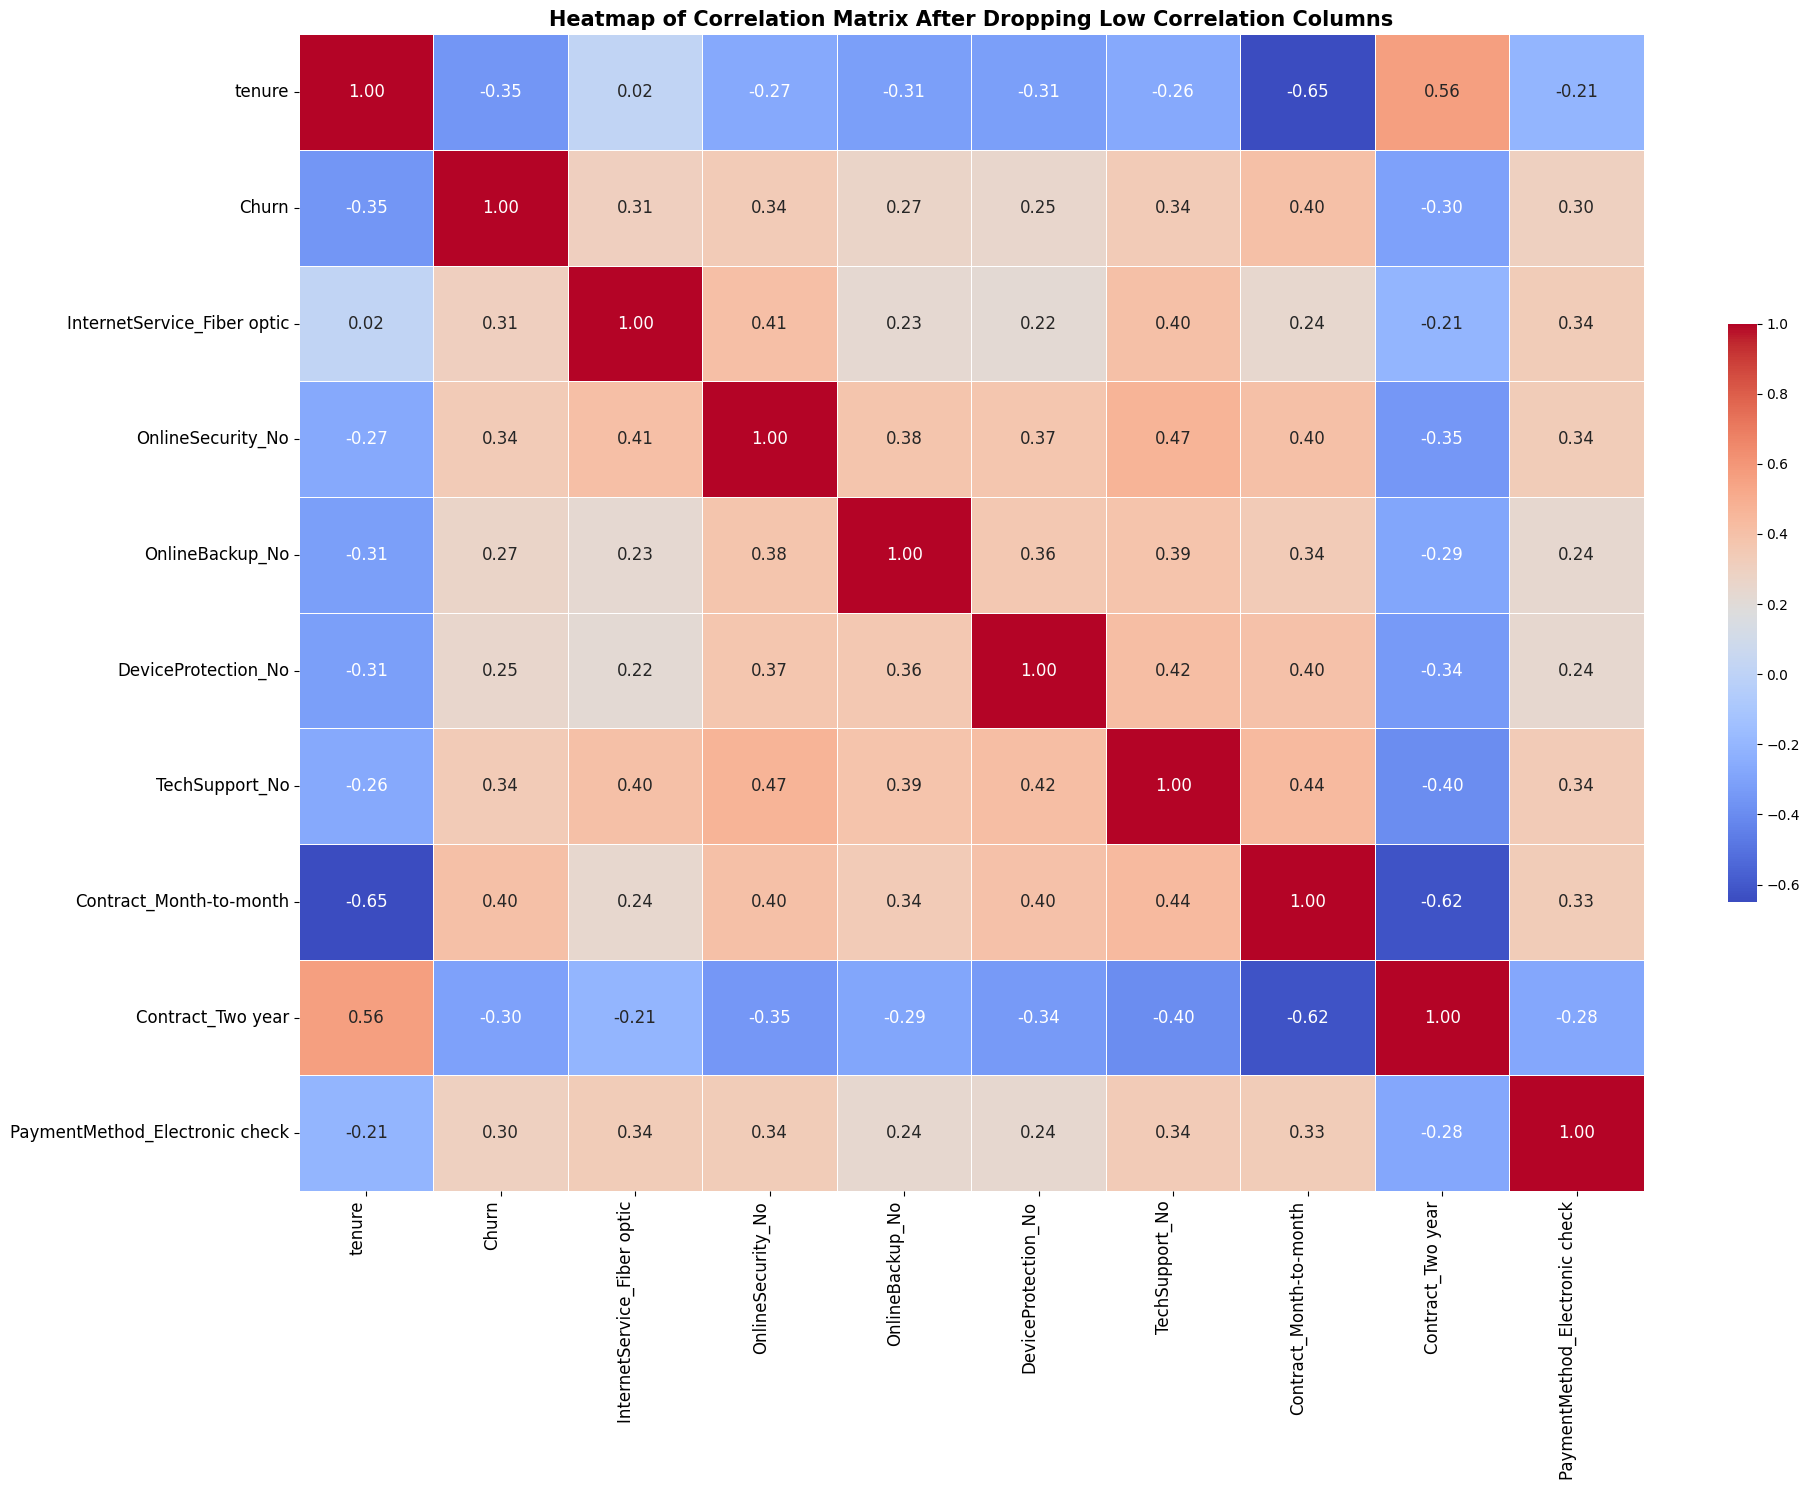

In [114]:
# Identify columns with absolute correlation to 'Churn' of 0.2 or below
columns_to_drop = correlation_with_churn[abs(correlation_with_churn) <= 0.25].index.tolist()

# Drop these columns from the DataFrame
df_filtered = df.drop(columns=columns_to_drop)

# Now, if you want to see a heatmap of this filtered DataFrame
filtered_correlation_matrix = df_filtered.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 12})
plt.title('Heatmap of Correlation Matrix After Dropping Low Correlation Columns', fontweight='bold', fontsize=15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()